In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
friendTextAll = pd.read_csv("friendText_forIR.csv")
friendTextIR = pd.read_csv("IR_saliencetask_withdata.csv")

In [8]:
countDatAll = np.zeros((2, len(friendTextAll)))
for s in range(0,len(friendTextAll.iloc[:,0])):
    #print(friendTextAll.iloc[s,0])
    countDatAll[0,s] = len(TextBlob(friendTextAll.iloc[s,1]).words)
    countDatAll[1,s] = len(TextBlob(friendTextAll.iloc[s,2]).words) 

In [9]:
countDatIR = np.zeros((2, len(friendTextIR)))
for s in range(0,len(friendTextIR.iloc[:,0])):
    #print(friendTextIR.iloc[s,0])
    countDatIR[0,s] = len(TextBlob(friendTextIR.iloc[s,1]).words)
    countDatIR[1,s] = len(TextBlob(friendTextIR.iloc[s,2]).words) 

In [19]:
countDatIR.shape

(2, 40)

In [18]:
countDatAll.shape

(2, 932)

In [21]:
print(countDatAll[0].mean())
print(countDatAll[1].mean())
print(countDatIR[0].mean())
print(countDatIR[1].mean())

48.47532188841202
8.875536480686696
126.625
8.525


In [59]:
AllCounts = pd.merge(friendTextAll, pd.DataFrame({'ID': friendTextAll.iloc[:,0], 'friMemLen': countDatAll[0,:], 'friAdjLen': countDatAll[1,:]}), on = "ID")
IRCounts = pd.merge(friendTextIR, pd.DataFrame({'Dyad': friendTextIR.iloc[:,0], 'friMemLen': countDatIR[0,:], 'friAdjLen': countDatIR[1,:]}), on = "Dyad")

In [68]:
AllCounts[['IPPA', 'ERQ_Cap', 'ERQ_Ten', 'friMemLen', 'friAdjLen']].corr().style.background_gradient(cmap='coolwarm')

,IPPA,ERQ_Cap,ERQ_Ten,friMemLen,friAdjLen
IPPA,1,0.0725236,0.100001,0.0354302,-0.0104257
ERQ_Cap,0.0725236,1,0.499565,0.0302393,0.0152734
ERQ_Ten,0.100001,0.499565,1,-0.00657528,0.0415964
friMemLen,0.0354302,0.0302393,-0.00657528,1,0.245593
friAdjLen,-0.0104257,0.0152734,0.0415964,0.245593,1


In [66]:
IRCounts[['friMemLen', 'friAdjLen', 'IPPA_total', 'IPPA_trust', 'IPPA_alien', 'IPPA_comm', 'HelperNegReint', 'IRQ_NE', 'ERQ_REP_H', 'ERQ_CAP_H']].corr().style.background_gradient(cmap='coolwarm')

,friMemLen,friAdjLen,IPPA_total,IPPA_trust,IPPA_alien,IPPA_comm,HelperNegReint,IRQ_NE,ERQ_REP_H,ERQ_CAP_H
friMemLen,1,0.376027,0.2582,0.284191,0.176089,0.365243,-0.0395179,0.0164923,0.0611515,0.0483093
friAdjLen,0.376027,1,0.231244,0.163995,-0.148865,0.213101,-0.213931,-0.150694,0.0228109,-0.140401
IPPA_total,0.2582,0.231244,1,0.830498,-0.528725,0.919324,-0.13748,0.508162,0.133742,0.0150094
IPPA_trust,0.284191,0.163995,0.830498,1,-0.206971,0.725297,-0.263611,0.339005,0.107182,-0.0410447
IPPA_alien,0.176089,-0.148865,-0.528725,-0.206971,1,-0.228131,0.0479368,-0.295615,-0.223885,-0.0341802
IPPA_comm,0.365243,0.213101,0.919324,0.725297,-0.228131,1,-0.0623767,0.49582,0.0446928,0.0276126
HelperNegReint,-0.0395179,-0.213931,-0.13748,-0.263611,0.0479368,-0.0623767,1,0.00189966,0.159713,0.0159477
IRQ_NE,0.0164923,-0.150694,0.508162,0.339005,-0.295615,0.49582,0.00189966,1,-0.0186918,-0.0140601
ERQ_REP_H,0.0611515,0.0228109,0.133742,0.107182,-0.223885,0.0446928,0.159713,-0.0186918,1,0.660543
ERQ_CAP_H,0.0483093,-0.140401,0.0150094,-0.0410447,-0.0341802,0.0276126,0.0159477,-0.0140601,0.660543,1


In [4]:
friendTextPvP = friendTextAll.iloc[0:892,:]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

custom_stop_words = text.ENGLISH_STOP_WORDS.union(["mom", "dad", "mother", "father", "friend", "unk", "UNK"])

In [5]:
cv = CountVectorizer(min_df = 1, ngram_range = (1,1), stop_words=custom_stop_words,)

count_vector_fri=cv.fit_transform(friendTextPvP.iloc[:,1])

In [6]:
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True, norm = 'l2',
                                   sublinear_tf = True)
tf_idf_vector_fri = tfidf_transformer.fit_transform(count_vector_fri)

In [7]:
feature_names_fri = cv.get_feature_names()

first_document_vector_fri = tf_idf_vector_fri[0]

tdf_fri = pd.DataFrame(first_document_vector_fri.T.todense(), index=feature_names_fri, columns=["tfidf"])
tdf_fri.sort_values(by=["tfidf"], ascending=False)

,tfidf
iphone,0.271505
required,0.271505
keyboard,0.271505
challenge,0.271505
staff,0.271505
wa,0.271505
facebook,0.256003
type,0.256003
especially,0.236473
story,0.229503


In [8]:
df_fri = pd.DataFrame(tf_idf_vector_fri.todense())

In [9]:
df_fri

,0,1,2,3,4,5,6,7,8,9,...,3956,3957,3958,3959,3960,3961,3962,3963,3964,3965
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def get_nmf_topics(model, n_top_words, num_topics):
    feat_names = cv.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    return pd.DataFrame(word_dict);

In [11]:
model_fri_2 = NMF(n_components=2, init="random", random_state=0)
W_fri_2 = model_fri_2.fit(df_fri)
H_fri_2 = model_fri_2.components_

model_fri_3 = NMF(n_components=3, init="random", random_state=0)
W_fri_3 = model_fri_3.fit(df_fri)
H_fri_3 = model_fri_3.components_

model_fri_4 = NMF(n_components=4, init="random", random_state=0)
W_fri_4 = model_fri_4.fit(df_fri)
H_fri_4 = model_fri_4.components_

model_fri_5 = NMF(n_components=5, init="random", random_state=0)
W_fri_5 = model_fri_5.fit(df_fri)
H_fri_5 = model_fri_5.components_

model_fri_6 = NMF(n_components=6, init="random", random_state=0)
W_fri_6 = model_fri_6.fit(df_fri)
H_fri_6 = model_fri_6.components_

model_fri_7 = NMF(n_components=7, init="random", random_state=0)
W_fri_7 = model_fri_7.fit(df_fri)
H_fri_7 = model_fri_7.components_

model_fri_8 = NMF(n_components=8, init="random", random_state=0)
W_fri_8 = model_fri_8.fit(df_fri)
H_fri_8 = model_fri_8.components_

model_fri_9 = NMF(n_components=9, init="random", random_state=0)
W_fri_9 = model_fri_9.fit(df_fri)
H_fri_9 = model_fri_9.components_

model_fri_10 = NMF(n_components=10, init="random", random_state=0)
W_fri_10 = model_fri_10.fit(df_fri)
H_fri_10 = model_fri_10.components_

model_fri_12 = NMF(n_components=12, init="random", random_state=0)
W_fri_12 = model_fri_12.fit(df_fri)
H_fri_12 = model_fri_12.components_

In [131]:
print(model_fri_2.reconstruction_err_)
print(model_fri_3.reconstruction_err_)
print(model_fri_4.reconstruction_err_)
print(model_fri_5.reconstruction_err_)
print(model_fri_6.reconstruction_err_)
print(model_fri_7.reconstruction_err_)
print(model_fri_8.reconstruction_err_)
print(model_fri_9.reconstruction_err_)
print(model_fri_10.reconstruction_err_)

29.472934027474956
29.38917273594732
29.318780302722292
29.253512848781153
29.187957728287696
29.123586110970308
29.067662035038428
29.009375400277438
28.954017549001705


In [25]:
get_nmf_topics(model_fri_8, 20, 8)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,night,met,going,time,school,birthday,music,went
1,late,friends,playing,just,high,party,concert,food
2,watching,ucla,game,talk,senior,fun,festival,day
3,ended,year,house,memory,year,cake,favorite,fun
4,decided,best,basketball,like,remember,played,drove,trip
5,stayed,got,games,talked,class,surprise,san,lot
6,movies,remember,getting,hours,trip,week,diego,ago
7,talking,close,tennis,lot,home,21st,weekend,good
8,came,new,play,talking,middle,celebrated,artists,got
9,ice,really,football,felt,highschool,celebrate,just,ate


In [139]:
count_vector_fri_adj=cv.fit_transform(friendTextPvP.iloc[:,2])
tf_idf_vector_fri_adj = tfidf_transformer.fit_transform(count_vector_fri_adj)
df_fri_adj = pd.DataFrame(tf_idf_vector_fri_adj.todense())

In [149]:
model_fri_2_adj = NMF(n_components=2, init="random", random_state=0)
W_fri_2_adj = model_fri_2_adj.fit(df_fri_adj)
H_fri_2_adj = model_fri_2_adj.components_

model_fri_3_adj = NMF(n_components=3, init="random", random_state=0)
W_fri_3_adj = model_fri_3_adj.fit(df_fri_adj)
H_fri_3_adj = model_fri_3_adj.components_

model_fri_4_adj = NMF(n_components=4, init="random", random_state=0)
W_fri_4_adj = model_fri_4_adj.fit(df_fri_adj)
H_fri_4_adj = model_fri_4_adj.components_

model_fri_5_adj = NMF(n_components=5, init="random", random_state=0)
W_fri_5_adj = model_fri_5_adj.fit(df_fri_adj)
H_fri_5_adj = model_fri_5_adj.components_

model_fri_10_adj = NMF(n_components=10, init="random", random_state=0)
W_fri_10_adj = model_fri_10_adj.fit(df_fri_adj)
H_fri_10_adj = model_fri_10_adj.components_

model_fri_15_adj = NMF(n_components=15, init="random", random_state=0)
W_fri_15_adj = model_fri_15_adj.fit(df_fri_adj)
H_fri_15_adj = model_fri_15_adj.components_

In [150]:
get_nmf_topics(model_fri_15_adj, 8, 15)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12,Topic # 13,Topic # 14,Topic # 15
0,smart,honest,outgoing,caring,hard,supportive,hardworking,loyal,fun,good,thoughtful,intelligent,trustworthy,kind,nice
1,funny,reliable,friendly,funny,working,happy,helpful,funny,spontaneous,listener,considerate,strong,dependable,loving,easy
2,independent,genuine,funny,sweet,sarcastic,compassionate,passionate,generous,hilarious,compassionate,helpful,sensitive,adventurous,funny,going
3,reliable,understanding,stubborn,emotional,patient,understanding,open,studious,energetic,quiet,empathetic,hilarious,reliable,strong,funny
4,spontaneous,hilarious,adventurous,determined,dedicated,athletic,minded,stubborn,loving,advice,compassionate,confident,best,hearted,friendly
5,passionate,optimistic,helpful,stubborn,sociable,funny,cooking,respectful,adventurous,hearted,generous,beautiful,hearted,gentle,crazy
6,goofy,creative,blunt,generous,passionate,driven,talented,mature,quirky,chill,giving,understanding,confident,happy,talk
7,adventurous,athletic,lazy,genuine,goofy,friendly,creative,wild,organized,great,sweet,goofy,considerate,sweet,quiet


In [28]:
import gensim
from gensim.models import KeyedVectors

In [27]:
recWords = ['recreation','party','dinner','celebration','fun','activity',
            'concert','drink','watch','movie','snack','games','music',
           'sports', 'trip', 'surprise', 'weekend', 'shopping'] 
acaWords = ['academic', 'school', 'class', 'freshman', 'dorm', 'grades', 
            'exam', 'degree', 'major', 'orientation', 'year', 'graduated',
            'junior', 'senior', 'sophomore', 'grade',  'assignment', 'test',
            'study', 'library', 'college']

In [30]:
vecs = KeyedVectors.load_word2vec_format('C:/Users/jguas/Documents/word2vec/GoogleNews-vectors-negative300.bin', binary=True)

In [67]:
recCompVec = np.zeros(300)
acaCompVec = np.zeros(300)

for word in recWords:
    recCompVec += vecs[word]

for word in acaWords:
    acaCompVec += vecs[word]
    

In [70]:
recCompVec = recCompVec / len(recWords)
acaCompVec = acaCompVec / len(acaWords)

In [91]:
vecs.similarity('skull', 'dog')

0.16952324

In [94]:
np.dot(vecs['skull'], vecs['dog']) / (np.linalg.norm(vecs['skull']) * np.linalg.norm(vecs['dog']))

0.16952324

In [95]:
np.dot(recCompVec, acaCompVec) / (np.linalg.norm(recCompVec) * np.linalg.norm(acaCompVec))

0.34775115683418434

In [128]:
def comp_cosine_sim(vec1, vec2):
    sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return(sim)

In [171]:
recMemSim = []
acaMemSim = []

for s in range(len(friendTextIR.iloc[:,0])):
    
    memWords = TextBlob(friendTextIR.iloc[s,1]).words
    recSim = []
    acaSim = []
    for w in range(len(memWords)):
        try:
            recSim.append(comp_cosine_sim(recCompVec, vecs[memWords[w]])) 
            acaSim.append(comp_cosine_sim(acaCompVec, vecs[memWords[w]]))
        except:
            pass
    recMemSim.append(np.mean(recSim))
    acaMemSim.append(np.mean(acaSim))   

In [174]:
friendTextIR

,Dyad,Memories,Adjectives,SoloNegReint,HelperNegReint,IPPA_alien_H,IPPA_comm_H,IPPA_trust_H,IPPA_total_H,IPPA_alien,...,IRQ_NT,IRQ_NE_H,IRQ_NT_H,ERQ_CAP,ERQ_CAP_H,ERQ_REP,ERQ_REP_H,extra_H,neuro_H,lone
0,1,One memory of us include how once when we were...,"Good listener, genuine, goofy, caring",1.722222,1.529412,7,40,50,118,11,...,28,24,16,4.500,6.250,4.833333,5.666667,19,13.0,37
1,4,"This past week was extremely busy, with planni...","Genuine, caring, supportive, introspective, wi...",1.444444,1.333333,10,35,50,110,18,...,7,27,17,5.250,3.125,4.000000,2.333333,17,11.0,66
2,5,The first memory that comes to mind was a day ...,"patient, kind, gentle, caring, quiet, undramat...",1.222222,1.055556,9,33,50,109,12,...,19,24,16,5.375,4.875,5.166667,3.833333,19,15.0,50
3,6,We live together so my favorite memories are o...,"She is kind, understanding, patient, non-judge...",2.388889,1.611111,11,40,50,114,15,...,14,28,28,4.250,6.625,4.166667,6.000000,19,12.0,36
4,7,"During finals week of winter quarter, my frien...","funny, incredibly smart, hardworking, bad at h...",1.500000,1.176471,14,27,43,91,11,...,23,20,14,5.750,5.875,4.500000,4.833333,22,16.0,29
5,8,I came back from spring break early Sunday mor...,"cheerful, positive, strong, protective",1.823529,1.666667,18,38,50,105,17,...,19,26,9,5.625,7.000,5.666667,6.666667,21,11.0,42
6,9,One memory that sticks out with my friend was ...,"kind, caring, supportive, loving",2.117647,1.277778,12,38,50,111,13,...,23,25,21,4.250,6.000,5.333333,5.666667,23,11.0,28
7,10,We went to Santa Monica with my friends to eat...,"easy-going, crazy (in a good way), understanding",1.705882,1.529412,11,35,50,109,13,...,16,26,19,3.625,4.375,4.833333,5.166667,15,17.0,30
8,12,"One day we went to Santa Monica together, and ...","bright, sarcastic, understanding, funny",1.444444,1.500000,9,32,49,107,12,...,22,28,24,4.625,7.000,5.000000,4.833333,19,11.0,27
9,13,"When we were in Rome, Italy, over spring break...","thoughtful, caring, hardworking, considerate o...",2.388889,2.000000,13,39,50,111,10,...,28,27,16,5.250,4.500,5.000000,4.333333,22,10.0,25


In [183]:
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'IPPA_trust_H'])[0,1])
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'IPPA_alien_H'])[0,1])
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'IPPA_comm_H'])[0,1])
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'IPPA_total_H'])[0,1])
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'IRQ_NT_H'])[0,1])
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'IRQ_NE_H'])[0,1])
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'HelperNegReint'])[0,1])
print(np.corrcoef(acaMemSim, friendTextIR.loc[:,'extra_H'])[0,1])

-0.11114022405231243
0.1665724283822485
0.05121183069637333
-0.07107634085398112
-0.004884790382818885
-0.11572566401625614
-0.07031073715279364
0.010023921889842226


In [184]:
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'IPPA_trust_H'])[0,1])
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'IPPA_alien_H'])[0,1])
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'IPPA_comm_H'])[0,1])
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'IPPA_total_H'])[0,1])
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'IRQ_NT_H'])[0,1])
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'IRQ_NE_H'])[0,1])
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'HelperNegReint'])[0,1])
print(np.corrcoef(recMemSim, friendTextIR.loc[:,'extra_H'])[0,1])

0.00032816084374477514
-0.01849691349915018
0.06253021901356166
0.03856007918833332
0.1390725779410277
-0.0953882395021116
0.07358322480548123
-0.011850889268583752


In [186]:
from scipy.stats import spearmanr

In [192]:
print(spearmanr(acaMemSim, friendTextIR.loc[:,'IPPA_trust_H']))
print(spearmanr(acaMemSim, friendTextIR.loc[:,'IPPA_alien_H']))
print(spearmanr(acaMemSim, friendTextIR.loc[:,'IPPA_comm_H']))
print(spearmanr(acaMemSim, friendTextIR.loc[:,'IPPA_total_H']))
print(spearmanr(acaMemSim, friendTextIR.loc[:,'IRQ_NT_H']))
print(spearmanr(acaMemSim, friendTextIR.loc[:,'IRQ_NE_H']))
print(spearmanr(acaMemSim, friendTextIR.loc[:,'HelperNegReint']))
print(spearmanr(acaMemSim, friendTextIR.loc[:,'extra_H']))

SpearmanrResult(correlation=-0.20383887259725195, pvalue=0.20709080904284655)
SpearmanrResult(correlation=0.24239001049333328, pvalue=0.13181785102911656)
SpearmanrResult(correlation=-0.023305577065179467, pvalue=0.8864933930400786)
SpearmanrResult(correlation=-0.19248154305237908, pvalue=0.23407629380395886)
SpearmanrResult(correlation=-0.010831261719921962, pvalue=0.947113062980757)
SpearmanrResult(correlation=-0.10463984185698678, pvalue=0.5204949938584854)
SpearmanrResult(correlation=-0.028473472525460227, pvalue=0.861545707757093)
SpearmanrResult(correlation=-0.01242130646674288, pvalue=0.9393626301689589)


In [190]:
print(spearmanr(recMemSim, friendTextIR.loc[:,'IPPA_trust_H']))
print(spearmanr(recMemSim, friendTextIR.loc[:,'IPPA_alien_H']))
print(spearmanr(recMemSim, friendTextIR.loc[:,'IPPA_comm_H']))
print(spearmanr(recMemSim, friendTextIR.loc[:,'IPPA_total_H']))
print(spearmanr(recMemSim, friendTextIR.loc[:,'IRQ_NT_H']))
print(spearmanr(recMemSim, friendTextIR.loc[:,'IRQ_NE_H']))
print(spearmanr(recMemSim, friendTextIR.loc[:,'HelperNegReint']))
print(spearmanr(recMemSim, friendTextIR.loc[:,'extra_H']))

SpearmanrResult(correlation=0.01203047130036137, pvalue=0.94126721344091)
SpearmanrResult(correlation=0.02644941657760456, pvalue=0.8713022831984495)
SpearmanrResult(correlation=0.027740241526974747, pvalue=0.8650778435568661)
SpearmanrResult(correlation=0.007800765660814192, pvalue=0.9618974821949617)
SpearmanrResult(correlation=0.10916028115990917, pvalue=0.5025352583564177)
SpearmanrResult(correlation=-0.13172309504350102, pvalue=0.41781831502877764)
SpearmanrResult(correlation=0.04895933724674844, pvalue=0.7641717312402929)
SpearmanrResult(correlation=-0.010904200333400237, pvalue=0.9467574241680462)


In [57]:
friendText = pd.read_csv("friendText_forIR.csv")

In [55]:
friendText.iloc[99,:]

ID                                                       CT1051
memory        During a time when I was confused about what t...
adjectives                                                  NaN
Name: 99, dtype: object

In [58]:
countDat = np.zeros((2, len(friendText)))
for s in range(0,len(friendText.iloc[:,0])):
    print(friendText.iloc[s,0])
    countDat[0,s] = len(TextBlob(friendText.iloc[s,1]).words)
    countDat[1,s] = len(TextBlob(friendText.iloc[s,2]).words) 

PP9000
PP9001
PP9002
PP9003
PP9004
PP9005
PP9006
PP9007
PP9008
PP9009
PP9010
PP9011
PP9012
PP9013
PP9014
PP9015
PP9016
PP9017
PP9018
PP9019
PP9020
PP9021
PP9022
PP9023
PP9024
PP9025
PP9026
PP9027
PP9028
PP9029
PP9030
PP9031
PP9032
PP9033
PP9034
PP9035
PP9036
PP9037
PP9038
PP9039
PP9040
PP9041
PP9042
PP9043
PP9044
PP9045
PP9046
PP9047
PP9048
CT1000
CT1001
CT1002
CT1003
CT1004
CT1005
CT1006
CT1007
CT1008
CT1009
CT1010
CT1011
CT1012
CT1013
CT1014
CT1015
CT1016
CT1017
CT1018
CT1020
CT1021
CT1022
CT1023
CT1024
CT1025
CT1026
CT1027
CT1028
CT1029
CT1030
CT1031
CT1032
CT1033
CT1034
CT1035
CT1036
CT1037
CT1038
CT1039
CT1040
CT1041
CT1042
CT1043
CT1044
CT1045
CT0146
CT1047
CT1048
CT1049
CT1050
CT1052
CT1053
CT1054
CT1055
CT1056
CT1057
CT1058
CT1059
CT1060
CT1061
CT1062
CT1063
CT1064
CT1065
CT1066
CT1067
CT1068
CT1069
CT1070
CT1071
CT1072
CT1073
CT1074
CT1075
CT1076
CT1077
CT1078
CT1079
CT1080
CT1081
CT1082
CT1083
CT1084
CT1085
CT1086
CT1087
CT1088
CT1089
CT2000
CT2001
CT2002
CT2003
CT2004
CT2005

In [62]:
print(countDat[0].mean())
print(countDat[1].mean())

36.81057268722467
8.127753303964758


In [65]:
np.corrcoef(countDat[0], countDat[1])

array([[1.        , 0.29345345],
       [0.29345345, 1.        ]])

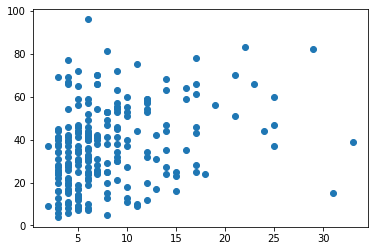

In [70]:
plt.scatter(countDat[1], countDat[0])

In [72]:
from scipy.stats import spearmanr
spearmanr(countDat[0], countDat[1])

SpearmanrResult(correlation=0.3211860660382368, pvalue=7.651154699707703e-07)

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

custom_stop_words = text.ENGLISH_STOP_WORDS.union(["mom", "dad", "mother", "father", "friend", "unk", "UNK"])

In [98]:
cv = CountVectorizer(min_df = 1, ngram_range = (1,1), stop_words=custom_stop_words,)

count_vector_fri=cv.fit_transform(friendText.iloc[:,1])

In [99]:
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True, norm = 'l2',
                                   sublinear_tf = True)
tf_idf_vector_fri = tfidf_transformer.fit_transform(count_vector_fri)

In [100]:
feature_names_fri = cv.get_feature_names()

first_document_vector_fri = tf_idf_vector_fri[0]

tdf_fri = pd.DataFrame(first_document_vector_fri.T.todense(), index=feature_names_fri, columns=["tfidf"])
tdf_fri.sort_values(by=["tfidf"], ascending=False)

,tfidf
type,0.249478
iphone,0.249478
staff,0.249478
wa,0.249478
keyboard,0.249478
required,0.249478
challenge,0.249478
word,0.231843
facebook,0.231843
story,0.231843


In [101]:
df_fri = pd.DataFrame(tf_idf_vector_fri.todense())

In [102]:
df_fri

,0,1,2,3,4,5,6,7,8,9,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.219513,0.0,0.0,0.000000,0.00000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.383005,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
9,0.0,0.0,0.0,0.0,0.0,0.164806,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0


In [104]:
def get_nmf_topics(model, n_top_words, num_topics):
    feat_names = cv.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    return pd.DataFrame(word_dict);

In [110]:
model_fri = NMF(n_components=2, init="random", random_state=0)
W_fri = model_fri.fit(df_fri)
H_fri = model_fri.components_


In [111]:
get_nmf_topics(model_fri, 15, 2)

,Topic # 01,Topic # 02
0,school,went
1,high,got
2,just,fun
3,time,really
4,year,food
5,friends,day
6,life,good
7,talk,going
8,best,time
9,like,ago


In [113]:
count_vector_fri_mem=cv.fit_transform(friendText.iloc[:,2])

In [114]:
tf_idf_vector_fri_mem = tfidf_transformer.fit_transform(count_vector_fri_mem)

In [115]:
feature_names_fri_mem = cv.get_feature_names()

first_document_vector_fri_mem = tf_idf_vector_fri_mem[0]

tdf_fri_mem = pd.DataFrame(first_document_vector_fri_mem.T.todense(), index=feature_names_fri_mem, columns=["tfidf"])
tdf_fri_mem.sort_values(by=["tfidf"], ascending=False)

,tfidf
energetic,0.366716
calm,0.352844
positive,0.352844
reliable,0.330956
spontaneous,0.330956
athletic,0.300107
adventurous,0.278219
trustworthy,0.273607
fun,0.235642
smart,0.216521


In [116]:
df_fri_mem = pd.DataFrame(tf_idf_vector_fri_mem.todense())

In [121]:
model_fri_mem = NMF(n_components=3, init="random", random_state=0)
W_fri_mem = model_fri_mem.fit(df_fri_mem)
H_fri_mem = model_fri_mem.components_


In [122]:
get_nmf_topics(model_fri_mem, 20, 3)

,Topic # 01,Topic # 02,Topic # 03
0,funny,fun,kind
1,smart,caring,intelligent
2,supportive,trustworthy,thoughtful
3,understanding,loving,ambitious
4,athletic,respectful,beautiful
5,friendly,adventurous,funny
6,compassionate,loyal,sweet
7,caring,hilarious,caring
8,nice,reliable,loving
9,driven,strong,considerate
